# Implementierung von K-Means

In [87]:
import pandas as pd
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt
import random

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

df = pd.read_csv("songs_25.csv")

Datensatz vorbereiten

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

daten = df['text']
tf_idf_vectorizor = TfidfVectorizer(
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(daten)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
sklearn_pca = PCA(n_components = 3)
data= sklearn_pca.fit_transform(tf_idf_array)

In [89]:
# --> array mit drei Komponenten 
print(data)

[[-0.00516563  0.02590398 -0.03969419]
 [-0.05966299 -0.1708136  -0.02573033]
 [ 0.04366487  0.05525095 -0.04528973]
 ...
 [ 0.06381699 -0.09380346 -0.02455097]
 [-0.02919828  0.01653483 -0.0075699 ]
 [-0.15961266 -0.14025815 -0.08490814]]


In [144]:

def select_centroids(k, data):
    initial_centroids = np.random.randint(data.shape[0], size=k)
    centroids = data[initial_centroids]
    return centroids

def assign_cluster(k, data, centroids):
    
    centers_old = np.zeros(centroids.shape) # to store old centers
    centers_new = deepcopy(centroids)# Store new centers
    
    
    clusters = np.zeros(data.shape[0])
    distances = np.zeros((data.shape[0],k))
    
    error = np.linalg.norm(centers_new - centers_old)

    # When, after an update, the estimate of that center stays the same, exit loop
    while error != 0:
    
        # Measure the distance to every center
        for i in range(k):
            distances[:,i] = np.linalg.norm(data - centers_new[i], axis=1)
        # Assign all training data to closest center
        cluster_labels = np.argmin(distances, axis = 1)
    
    
        centers_old = deepcopy(centers_new)
        # Calculate mean for every cluster and update the center
        for i in range(k):
            centers_new[i] = np.mean(data[cluster_labels == i], axis=0)
        error = np.linalg.norm(centers_new - centers_old)
  
        
    return cluster_labels, centers_new
    
        
    



In [145]:
# Number of clusters
k = 3

In [146]:
centroids = select_centroids(3, data)

In [147]:
centroids

array([[-0.04531203,  0.15377317, -0.02759817],
       [-0.16596509, -0.13926002,  0.07635318],
       [ 0.03005345, -0.04099104, -0.01508673]])

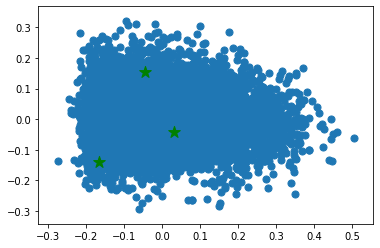

In [148]:
# Plot the data and the centers generated as random
plt.scatter(data[:, 0], data[:, 1], s=50, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g', s=150)

In [149]:
cluster_labels, centers_new = assign_cluster(3, data, centroids)

In [150]:
cluster_labels

array([0, 1, 0, ..., 2, 0, 1], dtype=int64)

In [151]:
centers_new

array([[-0.05108431,  0.09256638, -0.00468388],
       [-0.08153958, -0.06575136,  0.00122492],
       [ 0.1592294 , -0.01081657,  0.00328162]])

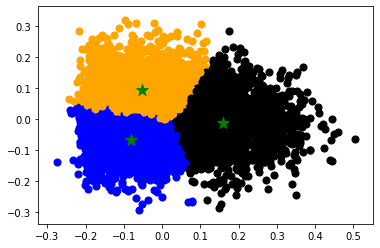

In [152]:
# Plot the data
n = data.shape[0]
colors=['orange', 'blue', 'black']
for i in range(n):
    plt.scatter(data[i, 0], data[i, 1], s=50, c = colors[cluster_labels[i]])
plt.scatter(centers_new[:, 0], centers_new[:, 1], marker='*', c='g', s=150)